In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist   # Библиотека базы выборок MNIST
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [19]:
# Выгрузка двнных из библиотеки MNIST

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# Стандартизация входных данных

x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [20]:
# Ручное разбиение выборки

size_val = 10000                                # Размер выборки валидации
x_val_split = x_train[:size_val]                # Выделяем первые наблюдения из обучающей выборки
y_val_split = y_train_cat[:size_val]            # В выборку валидации

x_train_split = x_train[size_val:]              # Выделяем следующие наблюдения для тестовой выборки
y_train_split = y_train_cat[size_val:]

In [21]:
# Создание модели

model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation = "relu"),
    Dense(10, activation = "softmax")
])

print(model.summary()) # Вывод структуры НС в консоль

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
#----- Ручное прописание оптимизатора
myAdam = keras.optimizers.Adam(learning_rate=0.1 )

# Параметр лямбда, ускорение момента, использование нестеровского момента
myOpt = keras.optimizers.SGD(learning_rate = 0.1, momentum = 0.0, nesterov = True)

model.compile(
    optimizer = myOpt,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [16]:
# Запуск процесса обучения: 80% - обучающая выборка, 20% - выборка валидации

# model.fit(x_train, y_train_cat, batch_size = 32, epochs = 5, validation_split = 0.2)
model.fit(x_train, y_train_cat, batch_size = 32, epochs = 5, 
          validation_data = (x_val_split, y_val_split))


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.4983 - loss: 1.3385 - val_accuracy: 0.5131 - val_loss: 1.3288
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - accuracy: 0.5118 - loss: 1.2709 - val_accuracy: 0.5270 - val_loss: 1.3301
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step - accuracy: 0.5204 - loss: 1.2519 - val_accuracy: 0.5359 - val_loss: 1.2801
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - accuracy: 0.5255 - loss: 1.2446 - val_accuracy: 0.5422 - val_loss: 1.2376
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 580us/step - accuracy: 0.5412 - loss: 1.1969 - val_accuracy: 0.5477 - val_loss: 1.2156


In [17]:
# Запуск тестовой выборки

model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.5303 - loss: 1.3467


[1.25619637966156, 0.5493999719619751]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.04847921 0.01883788 0.1010645  0.06150677 0.17005624 0.16650915
  0.0337912  0.04312623 0.178124   0.17850485]]
Распознанная цифра: 9


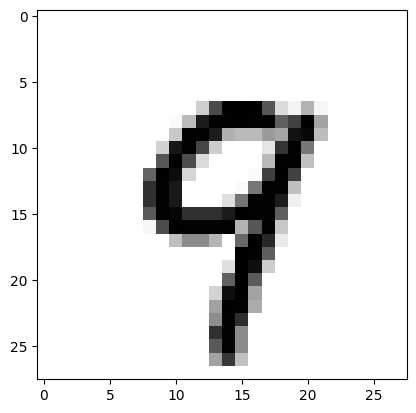

In [18]:
# Проверка распознавания цифр при помощи конкретного изображения 

n = 12
x = np.expand_dims(x_test[n], axis = 0)
res = model.predict(x)
print(res)
print(f'Распознанная цифра: {np.argmax(res)}')

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()